## CS 520 Project 1
Tejaswi Tripathi (tt507)

Ridwanur Sarder (rrs148)

** Write-up & Data Analysis at Bottom !

## Building the Ship

In [1]:
import random

d = 40

#Helper method to check neighbors in board initialization
def checkNeighbors(grid, r, c, a):
    return [grid[r-1][c],grid[r+1][c],grid[r][c-1],grid[r][c+1]].count(a)

#Create new board with given edge length
def createBoard(d):
    grid = [[0 for _ in range(d+2)] for _ in range(d+2)]

    for j in range(d+2):
        grid[0][j] = 2 
        grid[d+1][j] = 2 
    for i in range(d+2):
        grid[i][0] = 2 
        grid[i][d+1] = 2
    x = random.randint(1, d)
    y = random.randint(1, d)

    fringe = []
    fringe.append((x,y))

    deadEnds = []

    while len(fringe) > 0:
        curr = random.choice(fringe)
        fringe.remove(curr)
        r, c = curr[0], curr[1]
        if checkNeighbors(grid, r, c, 1) > 1:
            continue
        grid[r][c] = 1
        up = (r-1, c) 
        down = (r+1, c) 
        left = (r, c-1) 
        right = (r, c+1)
        deadEnd = True
        for elt in [up, down, left, right]:
            if grid[elt[0]][elt[1]] == 0:
                numOpenNeighbors = checkNeighbors(grid, elt[0], elt[1], 1)
                if numOpenNeighbors == 1:
                    deadEnd = False
                    fringe.append(elt)
        if deadEnd:
            deadEnds.append(curr)
    
    for elt in deadEnds:
        if grid[elt[0]][elt[1]] == 2:
            deadEnds.remove(elt)
            continue
        numOpenNeighbors = checkNeighbors(grid, elt[0], elt[1], 1)
        if numOpenNeighbors > 1:
            deadEnds.remove(elt)

    newList = random.sample(deadEnds, len(deadEnds) // 2)
    for elt in newList:
        r = elt[0]
        c = elt[1]
        up = (r-1, c) 
        down = (r+1, c) 
        left = (r, c-1) 
        right = (r, c+1)
        neighbors = [up,down,left,right]
        neighbors = [elt for elt in neighbors if grid[elt[0]][elt[1]] == 0]
        if neighbors == []:
            continue
        curr = random.choice(neighbors)
        grid[curr[0]][curr[1]] = 1
        
    return grid

board implementation details here if youd like

In [2]:
grid = createBoard(d)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

color_map_3 = {
    0: 'white',
    1: 'black',
    2: 'red'
}

color_map_7 = {
    0: 'white',
    1: 'black',
    2: 'red',
    3: 'orange',
    4: 'blue',
    5: 'purple',
    6: 'yellow'
}

def visualizeGrid(color_map, grid):
    fig, ax = plt.subplots()

    for i in range(len(grid)):
        for j in range(len(grid[i])):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=color_map[grid[i][j]]))

    ax.set_xlim(0, len(grid[0]))
    ax.set_ylim(0, len(grid))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.gca().invert_yaxis() 
    plt.show()

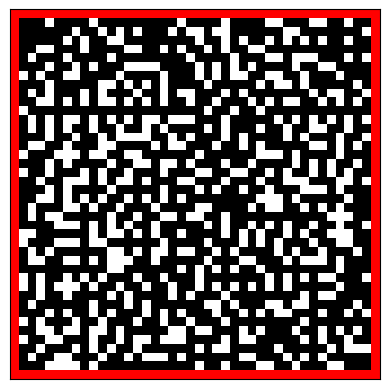

In [4]:
visualizeGrid(color_map_3, grid)

black = open cells, red = wall

## Coding the Fire


In [5]:
def setFire(grid, pt, q):
    if grid[pt[0]][pt[1]] == 3:
        return
    k = checkNeighbors(grid, pt[0], pt[1], 3)
    prob = 1 - (1-q)**k
    x = random.random()
    if x <= prob:
        grid[pt[0]][pt[1]] = 3
    return

In [6]:
def spreadFire(grid, fireLocs, q, df=None, i=None, timestep=None):
    fireLocsNew = []
    for curr in fireLocs:
        if grid[curr[0]][curr[1]] == 2:
            fireLocs.remove(curr)
            continue
        setFire(grid, curr, q)
        if grid[curr[0]][curr[1]] == 3:
            fireLocs.remove(curr)
            if df is not None and i is not None and timestep is not None:
                df.loc[curr][i] = timestep
            neighbors = [(curr[0]-1,curr[1]), (curr[0]+1,curr[1]), (curr[0], curr[1]-1), (curr[0], curr[1]+1)]
            for elt in neighbors:
                if grid[elt[0]][elt[1]] == 1 or grid[elt[0]][elt[1]] == 4:
                    fireLocsNew.append(elt)
    fireLocs.extend(fireLocsNew)
    return fireLocs

In [7]:
def reset_grid(grid):
    for i in range(len(grid)):  # Iterate through rows
            for j in range(len(grid[i])):  # Iterate through columns
                if (grid[i][j] in range(3,7)):
                    grid[i][j] = 1

## Location Initializations

In [8]:
def location_initialization(grid, botLoc=None, butLoc=None, fireLoc=None):
    botLoc = (random.randint(1, d), random.randint(1, d))
    while grid[botLoc[0]][botLoc[1]] == 0:
        botLoc = (random.randint(1, d), random.randint(1, d))

    butLoc = (random.randint(1, d), random.randint(1, d))
    while grid[butLoc[0]][butLoc[1]] == 0:
        butLoc = (random.randint(1, d), random.randint(1, d))

    fireLoc = (random.randint(1, d), random.randint(1, d))
    while grid[fireLoc[0]][fireLoc[1]] == 0:
        fireLoc = (random.randint(1, d), random.randint(1, d))

    notDistinct = (botLoc == butLoc) or (botLoc == fireLoc) or (butLoc == fireLoc)
    while notDistinct:
        botLoc = (random.randint(1, d), random.randint(1, d))
        while grid[botLoc[0]][botLoc[1]] == 0:
            botLoc = (random.randint(1, d), random.randint(1, d))
        butLoc = (random.randint(1, d), random.randint(1, d))
        while grid[butLoc[0]][butLoc[1]] == 0:
            butLoc = (random.randint(1, d), random.randint(1, d))
        fireLoc = (random.randint(1, d), random.randint(1, d))
        while grid[fireLoc[0]][fireLoc[1]] == 0:
            fireLoc = (random.randint(1, d), random.randint(1, d))
        notDistinct = (botLoc == butLoc) or (botLoc == fireLoc) or (butLoc == fireLoc)
    
    return botLoc,butLoc,fireLoc

note - for every new board we create we need to run createboard AND location_initialization

In [9]:
botLoc,butLoc,fireLoc = location_initialization(grid)
print(f"Bot Location: {botLoc}")
print(f"Button Location: {butLoc}")
print(f"Fire Location: {fireLoc}")

Bot Location: (26, 20)
Button Location: (8, 7)
Fire Location: (8, 21)


## Shortest Path (Bot 1)

In [10]:
import copy

bot1Grid = copy.deepcopy(grid)
bot1Grid[fireLoc[0]][fireLoc[1]] = 3

def shortestBot1(grid, botLoc, fireLocs, butLoc):
    fringe1 = []
    fringe1.append(botLoc)

    closed_set = {}
    prev1 = {}
    prev1[botLoc] = None

    while len(fringe1) > 0:
        curr1 = fringe1.pop(0)
        if curr1 == butLoc:
            break

        if curr1 not in closed_set:
            closed_set.update({curr1: 1})
            r1, c1 = curr1[0], curr1[1]
            neighbors1 = [(r1-1, c1),(r1+1, c1),(r1, c1-1),(r1, c1+1)]
            for elt in neighbors1:
                if bot1Grid[elt[0]][elt[1]] == 1 and elt not in closed_set:
                    fringe1.append(elt)
                    prev1[elt] = curr1

    path = []
    curr = butLoc
    try:
        path.append(curr)
        curr = prev1[curr]
    except:
        return False
    while curr is not None:
        path.append(curr)
        curr = prev1[curr]
    return path[::-1]


## Game Loop (Bot 1)

In [11]:
def gameLoop1(grid, botLoc, fireLoc, butLoc, trackTime, q):
    t = 1
    fireLocs = []
    r,c = fireLoc[0], fireLoc[1]
    grid[r][c] = 3
    fireLocs.extend(((r-1, c), (r+1, c), (r,c-1), (r,c+1)))
    success = True
    path = shortestBot1(bot1Grid, botLoc, fireLocs, butLoc)
    if not path:
        return False
    for i in path[1:]:
        fireLocs = spreadFire(bot1Grid, fireLocs, q)
        if bot1Grid[i[0]][i[1]] == 3:
            if trackTime: print(f"Bot1 failed in {t} timesteps.")
            success = False
            break
        t = t + 1
        bot1Grid[i[0]][i[1]] = 4
    l = len(path)
    bot1Grid[butLoc[0]][butLoc[1]] = 5
    bot1Grid[fireLoc[0]][fireLoc[1]] = 6
    return success
success_1 = gameLoop1(bot1Grid, botLoc, fireLoc, butLoc, True, 0.5)
if success_1: print("Success!")

Bot1 failed in 18 timesteps.


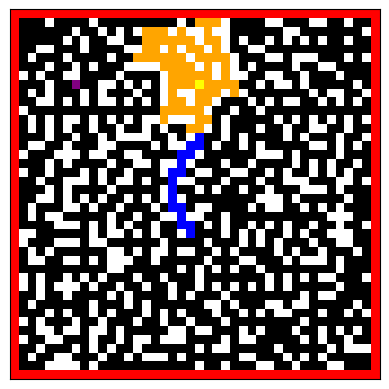

In [12]:
visualizeGrid(color_map_7, bot1Grid)

The yellow dot represents the source of the fire. The pink dot represents the button.

In [13]:
reset_grid(bot1Grid)

## Shortest Path (Bot 2)

In [14]:
def shortestBot2(grid, botLoc, fireLocs, butLoc, i, path):
    currentFires = set([])
    currentFires.add(fireLoc)
    for row in range(len(grid)):
        for col in range(len(grid[row])):
            if grid[row][col] == 3:
                currentFires.add((row, col))
    fringe1 = []
    fringe1.append(botLoc)

    closed_set = {}
    prev1 = {}
    prev1[botLoc] = None
    success = False

    while len(fringe1) > 0:
        curr1 = fringe1.pop(0)
        if curr1 == butLoc:
            success = True
            break

        if curr1 not in closed_set:
            closed_set.update({curr1: 1})
            r1, c1 = curr1[0], curr1[1]
            neighbors1 = [(r1-1, c1),(r1+1, c1),(r1, c1-1),(r1, c1+1)]
            for elt in neighbors1:
                if (grid[elt[0]][elt[1]] == 1 or grid[elt[0]][elt[1]] == 4) and elt not in closed_set and elt not in currentFires:
                    fringe1.append(elt)
                    prev1[elt] = curr1
    if not success: 
        return path

    path2 = []
    curr = butLoc
    while curr is not None:
        path2.append(curr)
        curr = prev1[curr]
    path2 = path2[::-1]
    if path2 != path[i:]:
        path[i:] = path2

    # Return the path from start to finish
    return path  

## Game Loop (Bot 2)

In [15]:
bot2Grid = copy.deepcopy(grid)
bot2Grid[fireLoc[0]][fireLoc[1]] = 3

def gameLoop2(grid, botLoc, fireLoc, butLoc, trackTime, q):
    t = 1
    fireLocs = []
    r,c = fireLoc[0], fireLoc[1]
    grid[r][c] = 3
    fireLocs.extend(((r-1, c), (r+1, c), (r,c-1), (r,c+1)))
    success = True
    pathBot2 = []
    pathBot2.append(botLoc)
    pathBot2 = shortestBot2(bot2Grid, botLoc, fireLocs, butLoc, 0, pathBot2)
    i = 1
    while i < len(pathBot2):
        fireLocs = spreadFire(bot2Grid, fireLocs, q)
        if bot2Grid[pathBot2[i][0]][pathBot2[i][1]] == 3:
            if trackTime: 
                print(f"Bot2 failed in {t} timesteps.")
            success= False
            break
        bot2Grid[pathBot2[i][0]][pathBot2[i][1]] = 4
        pathBot2 = shortestBot2(bot2Grid, pathBot2[i], fireLocs, butLoc, i, pathBot2)
        t = t + 1
        i = i + 1
    bot2Grid[butLoc[0]][butLoc[1]] = 5
    bot2Grid[fireLoc[0]][fireLoc[1]] = 6
    return success
success_2 = gameLoop2(bot2Grid, botLoc, fireLoc, butLoc, True, 0.5)
if success_2: print(f"Success!")

Bot2 failed in 46 timesteps.


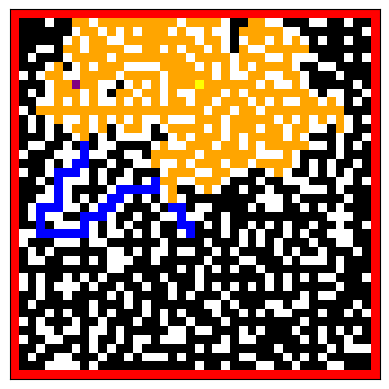

In [16]:
visualizeGrid(color_map_7, bot2Grid)

In [17]:
reset_grid(bot2Grid)

## Shortest Path (Bot 3)

In [18]:
def shortestBot3(grid, botLoc, fireLocs, butLoc, i, path):
    fringe1 = []
    fringe1.append(botLoc)

    closed_set = {}
    prev1 = {}
    prev1[botLoc] = None
    success = False

    while len(fringe1) > 0:
        curr1 = fringe1.pop(0)
        if curr1 == butLoc:
            success = True
            break

        if curr1 not in closed_set:
            closed_set.update({curr1: 1})
            r1, c1 = curr1[0], curr1[1]
            neighbors1 = [(r1-1, c1),(r1+1, c1),(r1, c1-1),(r1, c1+1)]
            for elt in neighbors1:
                if (grid[elt[0]][elt[1]] == 1 or grid[elt[0]][elt[1]] == 4) and elt not in closed_set and (elt not in fireLocs or elt == butLoc):
                    fringe1.append(elt)
                    prev1[elt] = curr1
    if not success: 
        return path

    path2 = []
    curr = butLoc
    while curr is not None:
        path2.append(curr)
        curr = prev1[curr]
    path2 = path2[::-1]
    if path2 != path[i:]:
        path[i:] = path2

    # Return the path from start to finish
    return path  

## Game Loop (Bot 3)

In [19]:
bot3Grid = copy.deepcopy(grid)
bot3Grid[fireLoc[0]][fireLoc[1]] = 3

def gameLoop3(grid, botLoc, fireLoc, butLoc, trackTime, q):
    t = 1
    fireLocs = []
    r,c = fireLoc[0], fireLoc[1]
    grid[r][c] = 3
    fireLocs.extend(((r-1, c), (r+1, c), (r,c-1), (r,c+1)))
    success = True
    pathBot3 = []
    pathBot3.append(botLoc)
    pathBot3 = shortestBot3(bot3Grid, botLoc, fireLocs, butLoc, 0, pathBot3)
    i = 1
    while i < len(pathBot3):
        fireLocs = spreadFire(bot3Grid, fireLocs, q)
        if bot3Grid[pathBot3[i][0]][pathBot3[i][1]] == 3:
            if trackTime:
                print(f"Bot3 failed in {t} timesteps.")
            success= False
            break
        bot3Grid[pathBot3[i][0]][pathBot3[i][1]] = 4
        pathBot3 = shortestBot3(bot3Grid, pathBot3[i], fireLocs, butLoc, i, pathBot3)
        t = t + 1
        i = i + 1
    bot3Grid[butLoc[0]][butLoc[1]] = 5
    bot3Grid[fireLoc[0]][fireLoc[1]] = 6
    return success

count = 0
for i in range(10):
    botLoc,butLoc,fireLoc = location_initialization(grid)
    reset_grid(bot3Grid)
    success = gameLoop3(bot3Grid, botLoc, fireLoc, butLoc, False, 1)
    if success:
        count += 1
print(count/10)

0.7


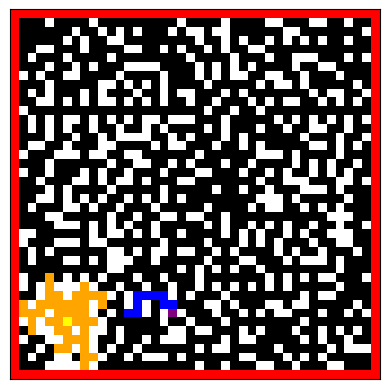

In [20]:
visualizeGrid(color_map_7, bot3Grid)

In [21]:
reset_grid(bot3Grid)

## Bot 4 Data Collection

In [22]:
def simulateFire(grid, fireLoc, df, numSims, q):
    r,c = fireLoc[0], fireLoc[1]
    for i in range(numSims):
        grid[r][c] = 3
        fireLocs = []
        fireLocs.extend(((r-1, c), (r+1, c), (r,c-1), (r,c+1)))
        t = 0
        while len(fireLocs) > 0:
            fireLocs = spreadFire(grid, fireLocs, q, df, i, t)
            t = t + 1
        reset_grid(grid)
    return df

In [23]:
def p(pt, df, t):
    return ((df.loc[pt] <= t).sum() / len(df.columns))

In [24]:
def d_manhattan(pt, butLoc):
    return abs(butLoc[0]-pt[0]) + abs(butLoc[1]-pt[1])

In [25]:
def C(pt, df, t, butLoc):
    return 100*p(pt, df, t) + 0.1*d_manhattan(pt, butLoc)

In [26]:
import itertools
import pandas as pd

bot4Grid = copy.deepcopy(grid)
def simulateBot4(grid, fireLoc, q):
    numSims = 40
    cells = list(itertools.product(range(1, 41), repeat=2))
    df = pd.DataFrame(0, index=pd.MultiIndex.from_tuples(cells, names=["Row", "Col"]),
                      columns=[f'Sim_{i+1}' for i in range(numSims)])
    df = simulateFire(grid, fireLoc, df, numSims, q)
    return df

df = simulateBot4(bot4Grid, fireLoc, 0.5)
print(df.head())

         Sim_1  Sim_2  Sim_3  Sim_4  Sim_5  Sim_6  Sim_7  Sim_8  Sim_9  \
Row Col                                                                  
1   1      113    124    112    114    123    128    106    126    116   
    2      112    128    109    110    120    128    108    124    115   
    3      107    123    114    107    119    128    109    127    121   
    4        0      0      0      0      0      0      0      0      0   
    5      112    122    106    104    117    126    102    118    112   

         Sim_10  ...  Sim_31  Sim_32  Sim_33  Sim_34  Sim_35  Sim_36  Sim_37  \
Row Col          ...                                                           
1   1       111  ...     127     109     132     127     117     121     118   
    2       111  ...     130     104     128     121     112     120     118   
    3       108  ...     126     101     127     121     113     121     117   
    4         0  ...       0       0       0       0       0       0       0   
 

In [27]:
# Test it out
sampleLocation = (15,25)
print(f"Estimated cost of going to {sampleLocation} by 150 timesteps: {C(sampleLocation, df, 150, butLoc)}")

Estimated cost of going to (15, 25) by 150 timesteps: 102.6


## Shortest Path (Bot 4)

In [28]:
from queue import PriorityQueue as pq

def shortestBot4(grid, botLoc, butLoc, df):
    fringe4 = pq()
    fringe4.put((0.0, botLoc))

    dist = {}
    dist[botLoc] = 0

    prev4 = {}
    prev4[botLoc] = None
    
    time = {}
    time[botLoc] = 0

    while fringe4.qsize() > 0:
        curr = fringe4.get()
        curr1 = curr[1]
        priority = curr[0]
        if curr1 == butLoc:
            break
        t = time[curr1]
        r1, c1 = curr1[0], curr1[1]
        neighbors1 = [(r1-1, c1),(r1+1, c1),(r1, c1-1),(r1, c1+1)]
        for elt in neighbors1:
            if (elt[0] < 1 or elt[0] > 40) or (elt[1] < 1 or elt[1] > 40):
                continue
            elt_cost = C(elt, df, t+1, butLoc)
            if (bot4Grid[elt[0]][elt[1]] == 1 and (elt == butLoc or elt not in dist or elt_cost < dist[elt])):
                fringe4.put((elt_cost, elt))
                dist[elt] = elt_cost
                prev4[elt] = curr1
                time[elt] = t + 1
    path4 = []
    curr = butLoc
    while curr is not None:
        path4.append(curr)
        curr = prev4[curr]

    # Return the path from start to finish
    return path4[::-1]

## Game Loop (Bot 4)

In [29]:
def gameLoop4(grid, botLoc, fireLoc, butLoc, trackTime, q):
    df = simulateBot4(grid, fireLoc, q=q)
    t = 1
    fireLocs = []
    r,c = fireLoc[0], fireLoc[1]
    fireLocs.extend(((r-1, c), (r+1, c), (r,c-1), (r,c+1)))
    success = True
    path4 = []
    path4 = shortestBot4(bot4Grid, botLoc, butLoc, df)
    grid[r][c] = 3
    for i in path4[1:]:
        if i == path4[-1]:
            break
        fireLocs = spreadFire(bot4Grid, fireLocs, q=q)
        if bot4Grid[i[0]][i[1]] == 3:
            if trackTime: 
                print(f"Bot4 failed in {t} timesteps.")
            success= False
            break
        t = t + 1
        bot4Grid[i[0]][i[1]] = 4
    bot4Grid[butLoc[0]][butLoc[1]] = 5
    bot4Grid[fireLoc[0]][fireLoc[1]] = 6
    return success


success_4 = gameLoop4(bot4Grid, botLoc, fireLoc, butLoc, True, 0.5)
if success_4: print("Success!")

Success!


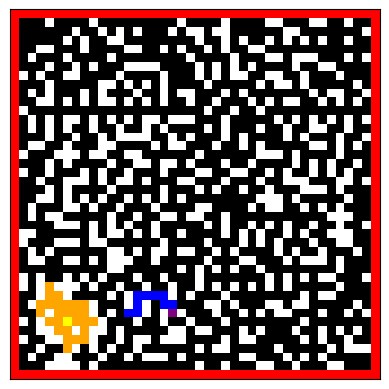

In [30]:
visualizeGrid(color_map_7, bot4Grid)

In [31]:
reset_grid(bot4Grid)

## Data Analysis

In [32]:
def does_path_exist(grid, fireLoc, butLoc, q, botLoc):
    r,c = fireLoc[0], fireLoc[1]
    grid[fireLoc[0]][fireLoc[1]] = 3
    fireLocs = []
    fireLocs.extend(((r-1, c), (r+1, c), (r,c-1), (r,c+1)))
    while grid[butLoc[0]][butLoc[1]] != 3:
        fireLocs = spreadFire(grid, fireLocs, q)
    
    fringe = []
    fringe.append(botLoc)
    closed_set = {}
    
    grid[butLoc[0]][butLoc[1]] = 1
    
    while len(fringe) > 0:
        curr1 = fringe.pop(0)
        if curr1 == butLoc:
            reset_grid(grid)
            return True
            
        if curr1 not in closed_set:
            closed_set.update({curr1: 1})
            r1, c1 = curr1[0], curr1[1]
            neighbors1 = [(r1-1, c1),(r1+1, c1),(r1, c1-1),(r1, c1+1)]
            for elt in neighbors1:
                if (bot1Grid[elt[0]][elt[1]] == 1 and elt not in closed_set) or elt == butLoc:
                    fringe.append(elt)
                    
    reset_grid(grid)
    return False

In [33]:
q_list = [0.1, 0.3, 0.5, 0.7, 0.9]
success_df_1 = pd.DataFrame(0, index=q_list, columns=['Bot1', 'Bot2', 'Bot3', 'Bot4'])
success_df_2 = pd.DataFrame(0, index=q_list, columns=['Bot1', 'Bot2', 'Bot3', 'Bot4'])
success_rates_bot4 = {}
numRounds = 75
only_bot_4 = []
#we would envelppe this in a for g in grids_for_testing and save the data both for the aggregate bot statistics and for per board basis if we think there might be anything cool, might take too long though
for q in q_list:
    success_rates_1 = [0.0,0.0,0.0,0.0]
    success_rates_2 = [0.0,0.0,0.0,0.0]
    counts_1 = [0,0,0,0]
    counts_2 = [0,0,0,0]
    counts_fail_bots = 0
    counts_bot4 = 0
    num_1 = 0
    for i in range(numRounds):
        
        grid_to_test = createBoard(d)
        botLoc,butLoc,fireLoc = location_initialization(grid_to_test)
        path_exists = does_path_exist(grid_to_test, fireLoc, butLoc, q, botLoc)
        while not path_exists:
            botLoc,butLoc,fireLoc = location_initialization(grid_to_test)
            path_exists = does_path_exist(grid_to_test, fireLoc, butLoc, q, botLoc)
        
        closer_to_fire = d_manhattan(botLoc, butLoc) >= d_manhattan(fireLoc, butLoc)
    
        bot1Grid = copy.deepcopy(grid_to_test)
        bot2Grid = copy.deepcopy(grid_to_test)
        bot3Grid = copy.deepcopy(grid_to_test)
        bot4Grid = copy.deepcopy(grid_to_test)
        
        bot1_success_1 = gameLoop1(bot1Grid, botLoc, fireLoc, butLoc, False, q)
        bot1Grid = copy.deepcopy(grid_to_test)
        bot1_success_2 = gameLoop1(bot1Grid, fireLoc, botLoc, butLoc, False, q)
        bot2_success_1 = gameLoop2(bot2Grid, botLoc, fireLoc, butLoc, False, q)
        bot2Grid = copy.deepcopy(grid_to_test)
        bot2_success_2 = gameLoop2(bot2Grid, fireLoc, botLoc, butLoc, False, q)
        bot3_success_1 = gameLoop3(bot3Grid, botLoc, fireLoc, butLoc, False, q)
        bot3Grid = copy.deepcopy(grid_to_test)
        bot3_success_2 = gameLoop3(bot3Grid, fireLoc, botLoc, butLoc, False, q)
        bot4_success_1 = gameLoop4(bot4Grid, botLoc, fireLoc, butLoc, False, q)
        reset_grid(bot4Grid)
        bot4_success_2 = gameLoop4(bot4Grid, fireLoc, botLoc, butLoc, False, q)
            
        # Run on a board configuration twice per round, switching fire and bot positions to ensure even spread of fire closer to button vs bot closer to button
        if bot1_success_1:
            if closer_to_fire:
                counts_1[0] += 1 
            else: counts_2[0] += 1
        if bot1_success_2:
            if closer_to_fire:
                counts_2[0] += 1 
            else: counts_1[0] += 1

        if bot2_success_1:
            if closer_to_fire:
                counts_1[1] += 1 
            else: counts_2[1] += 1
        if bot2_success_2:
            if closer_to_fire:
                counts_2[1] += 1 
            else: counts_1[1] += 1

        if bot3_success_1:
            if closer_to_fire:
                counts_1[2] += 1 
            else: counts_2[2] += 1
        if bot3_success_2:
            if closer_to_fire:
                counts_2[2] += 1 
            else: counts_1[2] += 1

        if bot4_success_1:
            if closer_to_fire:
                counts_1[3] += 1 
            else: counts_2[3] += 1
        if bot4_success_2:
            if closer_to_fire:
                counts_2[3] += 1 
            else: counts_1[3] += 1

        if not (bot1_success_1 or bot2_success_1 or bot3_success_1):
            counts_fail_bots += 1
            if bot4_success_1:
                counts_bot4 += 1
                only_bot_4.append(bot4Grid)
        if not (bot1_success_2 or bot2_success_2 or bot3_success_2):
            counts_fail_bots += 1
            if bot4_success_2:
                counts_bot4 += 1
                only_bot_4.append(bot4Grid)
                
    for bot in range(len(counts_1)):
        success_rates_1[bot] = counts_1[bot]/(numRounds)
        success_rates_2[bot] = counts_2[bot]/(numRounds)
    success_df_1.loc[q] = success_rates_1
    success_df_2.loc[q] = success_rates_2
    if counts_fail_bots == 0:
        success_rates_bot4[q] = 0.0
    else: success_rates_bot4[q] = counts_bot4/counts_fail_bots
    
    print(f"Success rates, button starts closer to fire: \n{success_df_1.loc[q]}")
    print(f"Success rates, button starts closer to bot: \n{success_df_2.loc[q]}")
    print(f"Success rate of bot 4 given that all other bots failed, q = {q}: \n{success_rates_bot4[q]}")
    print()
# success_df_1.to_csv(file_path)
# success_df_2.to_csv(file_path.replace("simulations_1.csv", "simulations_2.csv"))
success_rates_bot4_df = pd.DataFrame(list(success_rates_bot4.items()), columns=['q', 'SuccessRate_Bot4'])

Success rates, button starts closer to fire: 
Bot1    0.746667
Bot2    0.906667
Bot3    0.893333
Bot4    0.866667
Name: 0.1, dtype: float64
Success rates, button starts closer to bot: 
Bot1    1
Bot2    1
Bot3    1
Bot4    1
Name: 0.1, dtype: int64
Success rate of bot 4 given that all other bots failed, q = 0.1: 
0.0

Success rates, button starts closer to fire: 
Bot1    0.600000
Bot2    0.706667
Bot3    0.733333
Bot4    0.733333
Name: 0.3, dtype: float64
Success rates, button starts closer to bot: 
Bot1    1
Bot2    1
Bot3    1
Bot4    1
Name: 0.3, dtype: int64
Success rate of bot 4 given that all other bots failed, q = 0.3: 
0.17647058823529413

Success rates, button starts closer to fire: 
Bot1    0.520000
Bot2    0.573333
Bot3    0.546667
Bot4    0.573333
Name: 0.5, dtype: float64
Success rates, button starts closer to bot: 
Bot1    0.986667
Bot2    1.000000
Bot3    0.986667
Bot4    1.000000
Name: 0.5, dtype: float64
Success rate of bot 4 given that all other bots failed, q = 0.5: 

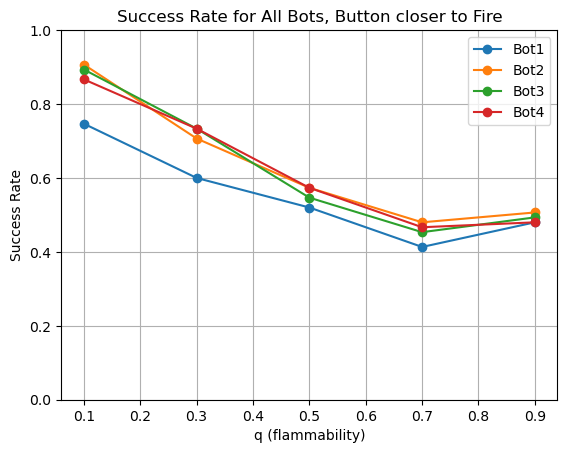

In [34]:
# Plotting for each bot, Button closer to Fire
plt.figure()

# Plot each bot's success rate on the same plot, with different markers and colors
for bot in ['Bot1', 'Bot2', 'Bot3', 'Bot4']:
    plt.plot(q_list, success_df_1[bot], marker='o', label=bot)

# Add labels and title
plt.title('Success Rate for All Bots, Button closer to Fire')
plt.xlabel('q (flammability)')
plt.ylabel('Success Rate')

# Set the y-axis limits
plt.ylim(0, 1)

# Show the grid for clarity
plt.grid(True)

# Add a legend to differentiate the bots
plt.legend()

# Show the plot
plt.show()

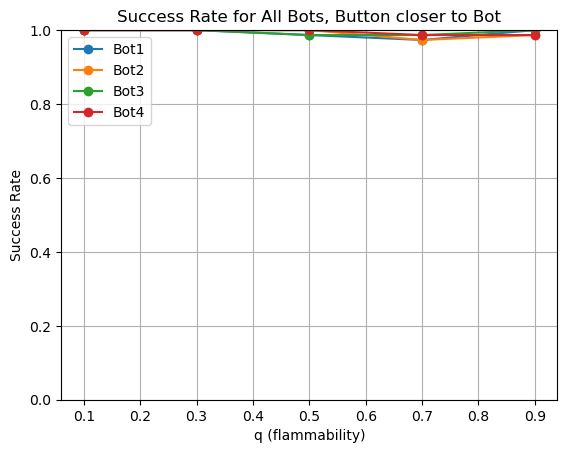

In [39]:
# Plotting for each bot, button closer to bot
plt.figure()

# Plot each bot's success rate on the same plot, with different markers and colors
for bot in ['Bot1', 'Bot2', 'Bot3', 'Bot4']:
    plt.plot(q_list, success_df_2[bot], marker='o', label=bot)

# Add labels and title
plt.title('Success Rate for All Bots, Button closer to Bot')
plt.xlabel('q (flammability)')
plt.ylabel('Success Rate')

# Set the y-axis limits
plt.ylim(0, 1)

# Show the grid for clarity
plt.grid(True)

# Add a legend to differentiate the bots
plt.legend()

# Show the plot
plt.show()

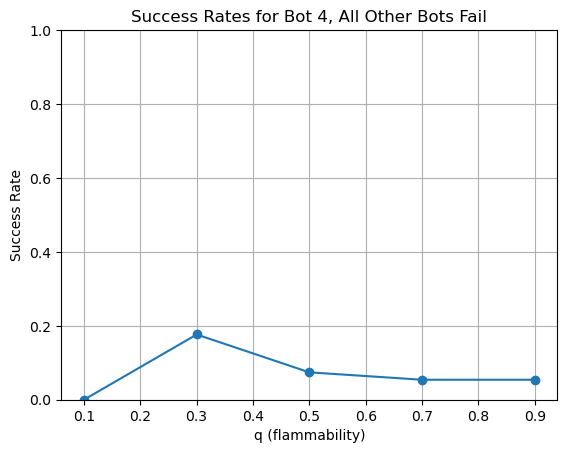

In [36]:
# Plotting for bot 4 success rate, all other bots failed
plt.figure()  # Create a new figure for each bot
success_rates = [success_rates_bot4[q] for q in q_list]
plt.plot(q_list, success_rates, marker='o')

# Add labels and title
plt.title(f'Success Rates for Bot 4, All Other Bots Fail')
plt.xlabel('q (flammability)')
plt.ylabel('Success Rate')

plt.ylim(0,1)

# Show the grid for clarity
plt.grid(True)

# Show the plot
plt.show()

## Bot 4 Logic
The expression that represents the probability of a given cell being set on fire is:
$$
1-(1-q)^K
$$
where
$q = \text{ship flammability,}$
$K = \text{number of on-fire neighbors.}$

Our goal for Bot 4 is to forecast which cells we think are most likely to be on fire by the time the bot reaches them. This way, the bot can choose a path that avoids the highest-risk cells as efficiently as possible.

Our approach will be an implementation of the Uniform-Cost Search Algorithm in which our cost function will take in a given cell's probability of being set on fire several steps in advance. There are a few ways to perform this:
1. Markov Chain Monte Carlo Method: Before starting the algorithm, simulate the fire spreading throughout the grid $n$ times. Create a dataframe that records each open cell and which timestep $t_i$ for $i=1,...,n$ it was set on fire, with cells as rows and simulations as columns. We will be able to estimate the likelihood of a given cell being on fire by a given timestep by taking the rate of being on fire out of all simulations (shown below). This will give an estimate for the true distribution of probabilities for each cell. Then, when running UCS, when considering a cell for exploration, we take into account its calculated probability.
2. For each iteration of UCS, given a cell being considered, mathematically calculate its probability that it will be set on fire by a certain timestep. This is possible but would be more expensive than simulation.

We will choose option 1 with cost function $$C(node)=\alpha * p(\text{node on fire}|t)+\beta * d$$ 
where 
$$\alpha = \text{weight for } p,$$
$$p(\text{node on fire}|t)=\frac{1}{n}\sum_{i=1}^{n} 1 (t_i\leq t),$$
$$\beta = \text{weight for } d,$$
$$d=\text{Manhattan distance from node to button.}$$

Note that using the Manhattan distance is a relaxation of the problem, as it assumes that every cell between the bot and the button is open.

Also note that the coefficients $\alpha$ and $\beta$ allow us to quantify how risk-averse we want to be. Early on, the algorithm should be encouraged to explore more; later on, the algorithm will prioritize cells closer to the button. After trial and error, we choose $\alpha = 100$ and $\beta = 0.1$.

## Results & Discussion

We separated our results into 2 bins: those for which the button was closer to the bot, and those for which the button was closer to the fire. We ignored all cases where no path was possible, as these cases would not tell us anything about the quality of a bot: we determined whether a path was possible by spreading the fire until reaching the button, then searching for a path given the new fire cells. This algorithm is in our does_path_exist() function. We also only used every odd $q$ in the interval $[0.1,0.9]$ for the sake of computation.

As expected, all four bots performed similarly in the first bin and showed some variation in the second bin. Each bot showed a consistently high success rate for the former bin regardless of $q$; for the second bin, each bot's success rate decreased as $q$ increased. Bot 4 overall showed similar success rates to bots 2 and 3 and higher than bot 1. From these results, we can say with confidence that bot 4 is similar in quality to bots 2 and 3, although we believe that it has potential to be better through optimal choices for weights in the cost function.

What was also interesting to consider were the cases in which all bots failed except bot 4; we were hoping to answer the question of what bot 4 was potentially doing better than the other 3 bots. The success rate of bot 4 given that all other bots failed was nonzero but showed no trend as $q$ increased. Additionally, given the number of replications being 75 for each value of $q$, it's entirely possible that each bot, given it was the only success, had a nonzero success rate; we can likely ascribe bot 4's success at times to luck. Therefore, we cannot conclude anything about bot 4's quality from this data.

However, we hypothesize that Bot 4 would fare best when the fire begins in between the button and the bot: while the other 3 bots will always find the shortest possible path between themselves and the button, bot 4 will allow for a longer path in the hopes of reaching the button. We perform an experiment where we predetermine the locations of the bot and button to start at opposite points in the grid, with the fire source in the middle.

In [37]:
q_list = [0.1, 0.3, 0.5, 0.7, 0.9]
success_df = pd.DataFrame(0, index=q_list, columns=['Bot1', 'Bot2', 'Bot3', 'Bot4'])
numRounds = 75
grids = []
#we would envelppe this in a for g in grids_for_testing and save the data both for the aggregate bot statistics and for per board basis if we think there might be anything cool, might take too long though
for q in q_list:
    success_rates = [0.0,0.0,0.0,0.0]
    counts = [0,0,0,0]
    for i in range(numRounds):
        
        grid_to_test = createBoard(d)
        
        j = 15
        botLoc = (1, j)
        while grid_to_test[botLoc[0]][botLoc[1]] == 0:
            botLoc = (1, j+1)
            j = j+1
        
        j = 15
        butLoc = (40, j)
        while grid_to_test[butLoc[0]][butLoc[1]] == 0:
            butLoc = (1, j+1)
            j = j+1

        j = 15
        fireLoc = (20, j)
        while grid_to_test[fireLoc[0]][fireLoc[1]] == 0:
            fireLoc = (1, j+1)
            j = j+1
            
        path_exists = does_path_exist(grid_to_test, fireLoc, butLoc, q, botLoc)
        while not path_exists:
            grid_to_test = createBoard(d)
            j = 15
            botLoc = (1, j)
            while grid_to_test[botLoc[0]][botLoc[1]] == 0:
                botLoc = (1, j+1)
                j = j+1

            j = 15
            butLoc = (40, j)
            while grid_to_test[butLoc[0]][butLoc[1]] == 0:
                butLoc = (1, j+1)
                j = j+1

            j = 15
            fireLoc = (20, j)
            while grid_to_test[fireLoc[0]][fireLoc[1]] == 0:
                fireLoc = (1, j+1)
                j = j+1
            
            path_exists = does_path_exist(grid_to_test, fireLoc, butLoc, q, botLoc)

        bot1Grid = copy.deepcopy(grid_to_test)
        bot2Grid = copy.deepcopy(grid_to_test)
        bot3Grid = copy.deepcopy(grid_to_test)
        bot4Grid = copy.deepcopy(grid_to_test)
        
        bot1_success = gameLoop1(bot1Grid, botLoc, fireLoc, butLoc, False, q)
        bot2_success = gameLoop2(bot2Grid, botLoc, fireLoc, butLoc, False, q)
        bot3_success = gameLoop3(bot3Grid, botLoc, fireLoc, butLoc, False, q)
        bot4_success = gameLoop4(bot4Grid, botLoc, fireLoc, butLoc, False, q)
        
        if bot1_success:
            counts[0] += 1

        if bot2_success:
            counts[1] += 1

        if bot3_success:
            counts[2] += 1

        if bot4_success:
            counts[3] += 1
        
        grids.append(bot4Grid)
                
    for bot in range(len(counts)):
        success_rates[bot] = counts[bot]/(numRounds)
    success_df.loc[q] = success_rates
    
    print(f"Success rates, q = {q}: \n{success_df.loc[q]}")
    print()

Success rates, q = 0.1: 
Bot1    0.586667
Bot2    0.960000
Bot3    0.960000
Bot4    0.826667
Name: 0.1, dtype: float64

Success rates, q = 0.3: 
Bot1    0.666667
Bot2    0.866667
Bot3    0.893333
Bot4    0.786667
Name: 0.3, dtype: float64

Success rates, q = 0.5: 
Bot1    0.573333
Bot2    0.666667
Bot3    0.746667
Bot4    0.693333
Name: 0.5, dtype: float64

Success rates, q = 0.7: 
Bot1    0.573333
Bot2    0.666667
Bot3    0.720000
Bot4    0.640000
Name: 0.7, dtype: float64

Success rates, q = 0.9: 
Bot1    0.440000
Bot2    0.600000
Bot3    0.653333
Bot4    0.613333
Name: 0.9, dtype: float64



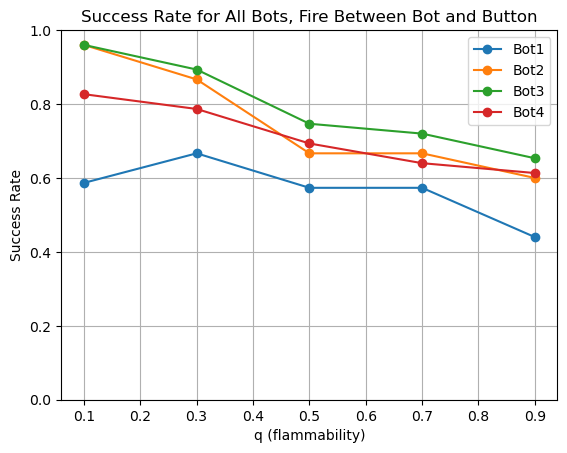

In [38]:
# Plotting for each bot, Button closer to Fire
plt.figure()

# Plot each bot's success rate on the same plot, with different markers and colors
for bot in ['Bot1', 'Bot2', 'Bot3', 'Bot4']:
    plt.plot(q_list, success_df[bot], marker='o', label=bot)

# Add labels and title
plt.title('Success Rate for All Bots, Fire Between Bot and Button')
plt.xlabel('q (flammability)')
plt.ylabel('Success Rate')

# Set the y-axis limits
plt.ylim(0, 1)

# Show the grid for clarity
plt.grid(True)

# Add a legend to differentiate the bots
plt.legend()

# Show the plot
plt.show()

## Results & Discussion (Contd.)
We observe that bot 4 performs similar to if not slightly worse than bots 2 and 3 but better than bot 1, in the cases where the fire starts between the bot and the button. We believe that this is due to suboptimal weights in the cost function. Given this, we have no evidence to support our hypothesis that bot 4 performs better in these cases.

## Why Does Each Bot Fail?

Every bot has at least one or two glaring weaknesses that sum up why they fail for certain board configurations: 

Bot 1, for instance, planning a shortest path from the beginning and ignoring the fire altogether, fails if the fire will at any point interfere with the bot's path. This is okay when the fire is far away enough and/or the flammability is low enough that the fire will not reach the bot's path before it arrives at the button, but keeping track of the fire at any capacity would help the bot make more informed decisions. 

Bot 2 will calculate the shortest path at every time step, treating the fire as an obstacle, basically a growing wall. This gives some shielding against fire growth, but can get outpaced by fire cells' neighbors catching fire and getting in the way of bot 2's path. It can very easily pick a path that may get intercepted and cut off by fire, highlighting a lack of foresight on how the fire may spread. The bot would benefit from a more cautious or predictive calculation to weigh into what cells to potentially avoid in addition to the existing fire cells.



Bot 3 will calculate the shortest path at every time step but while treating the fire as a threat, going as far as to avoid fire neighbors as well as fire. This will make it difficult for bot 3 to catch fire, but because neighbors are automatically avoided regardless of their probability of being set on fire, bot 3 will often be avoiding cells that aren't actually all that risky. This has a stronger negative impact when bot 3 is forced to take less than optimal paths in order to avoid the fire. Increasing the distance it needs to travel, especially when the ship layout is configured in such a way that the path from one cell to another is not usually a Manhattan-distance type path, can actually lead to the fire spreading too much before the bot can reach the button. At lower flammabilities, the overcautiousness can make the bot take too long to reach the button, while at higher flammabilities, the bot simply does not have anything to help it get to the button (would lead to more running from the fire than getting to the button). These could be amended by being more flexible in what to avoid - the neighbors of fire cells can potentially benefit from a threshold system determining whether one should be avoided, where the threshold is a function of information such as how many neighbors are on fire and the flammability.



Bot 4 runs simulations of fire spread and then attempts to calculate a probabilistically optimal path to the goal by keeping track of what time step a cell is expected to catch on fire given a given fire source cell. This corresponds to a number of weaknesses that really hurt the bot's performance. Firstly, the lack of real time awareness of the fire/the bot's overreliance on simulation data reflects an inflexibility when the fire spreads in such a way that contradict the simulation data and weights. The weights are also likely not optimally chosen, as our best attempt with trial and error yielded suboptimal results but still relatively on par with 2 and 3, even surpassing them for q=0.5. This along with the inability to react to real-time fire spread hurt the bot's ability when the fire gets into the way of the bot's path. The weights, also being static, could benefit from being adjusted as a function of the simulation data through an optimization algorithm such as gradient descent. Overall the weaknesses for bot four would be best amended by having more dynamic weights as a function of information available to the bot and awareness of current fire spread.

## Ideal Bot
An ideal bot would make decisions that best weigh the risk of navigating through the fire with the reward of getting closer to the goal. The best approach to this, in our opinion, is a predictive and adaptive pathfinding approach similar to the MCMC simulations of our current Bot 4. The bot would initially simulate fire spread iteratively to generate a map of probabilities for whether a cell would catch fire over any given number of timesteps, like our bot 4 does. The ideal bot would then generate and dynamically adjust the weights $\alpha$ and $\beta$ in the cost function using supervised learning algorithms such as gradient descent. Without memory and time constraints, a way to implement this would be to run simulations at every time step, adjusting weights based on simulated fire spreads versus real fire spread. This would allow the bot to incorporate real time path correction using the actual fire spread to dynamically adjust its route if necessary.